In [4]:
import pandas as pd
import numpy as np

In [5]:
#Scaling data
from sklearn.preprocessing import StandardScaler as ss
#Importing PCA class
from sklearn.decomposition import PCA
#For data splitting
from sklearn.model_selection import train_test_split
#For modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
#For performance measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support
#For plotting
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("../input/data.csv")

In [7]:
df.shape

(569, 33)

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
#Checking if any column has any missing variable
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
# Dropping Columns that are not needed          
df=df.drop(columns = "id")
df=df.drop(columns = "Unnamed: 32")

In [11]:
df.shape

(569, 31)

In [12]:
df.columns.values

array(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

In [13]:
#Segregating dataset into predictors (X) 
X = df.iloc[:, 1:31]

In [14]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.01369,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.01486,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.02143,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [15]:
#Segregating dataset into Target (Y) 
y = df.loc[:,['diagnosis']].values

In [16]:
y

array([['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
       ['B'],
       ['M'],
       ['M'],
       ['B'],
       ['B'],
       ['B'],
       ['B'],
       ['M'],
      

In [17]:
#Mapping values in ' y ' (target) from 'M' and 'B' to 1 and 0
y[y=='M'] = 1
y[y=='B'] = 0

In [18]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [19]:
y = y.astype('int64') 

In [20]:
#Scale all numerical features in X  using sklearn's StandardScaler class
scale = ss()
X = scale.fit_transform(X)

In [21]:
X.shape

(569, 30)

In [22]:
pca = PCA()
out = pca.fit_transform(X)

In [23]:
out.shape

(569, 30)

In [24]:
pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [25]:
#Retaining as many principal components (PCs) as explain 95% variance
X = out[:, :10]

In [26]:
y = y.ravel()

In [27]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    shuffle = True
                                                    )

In [28]:
#Creating default classifiers
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
et = ExtraTreesClassifier(n_estimators=100)
gbm = GradientBoostingClassifier()
xg = XGBClassifier(learning_rate=0.5,
                   reg_alpha= 5,
                   reg_lambda= 0.1)
knn = KNeighborsClassifier()

In [29]:
#Training data
dt1 = dt.fit(X_train,y_train)
rf1 = rf.fit(X_train,y_train)
et1 = et.fit(X_train,y_train)
gbm1 = gbm.fit(X_train,y_train)
xg1 = xg.fit(X_train,y_train)
knn1 = knn.fit(X_train,y_train)

In [30]:
#Making predictions
y_pred_dt = dt1.predict(X_test)
y_pred_rf = rf1.predict(X_test)
y_pred_et = et1.predict(X_test)
y_pred_gbm = gbm1.predict(X_test)
y_pred_xg = xg1.predict(X_test)
y_pred_knn = knn1.predict(X_test)

In [31]:
#Getting probability values
y_pred_dt_prob = dt1.predict_proba(X_test)
y_pred_rf_prob = rf1.predict_proba(X_test)
y_pred_et_prob = et1.predict_proba(X_test)
y_pred_gbm_prob = gbm1.predict_proba(X_test)
y_pred_xg_prob = xg1.predict_proba(X_test)
y_pred_knn_prob = knn1.predict_proba(X_test)

In [32]:
#Calculating accuracy
print("Accuracy score of Decision Tree Classifier is :" ,accuracy_score(y_test,y_pred_dt))
print("Accuracy score of Random Forest Classifier is :" ,accuracy_score(y_test,y_pred_rf))
print("Accuracy score of Extra Trees Classifier is :" ,accuracy_score(y_test,y_pred_et))
print("Accuracy score of Gradient Boost Classifier is :" ,accuracy_score(y_test,y_pred_gbm))
print("Accuracy score of XG Boost Classifier is :" ,accuracy_score(y_test,y_pred_xg))
print("Accuracy score of KNeighbors Classifier is :" ,accuracy_score(y_test,y_pred_knn))

Accuracy score of Decision Tree Classifier is : 0.9473684210526315
Accuracy score of Random Forest Classifier is : 0.9473684210526315
Accuracy score of Extra Trees Classifier is : 0.9649122807017544
Accuracy score of Gradient Boost Classifier is : 0.956140350877193
Accuracy score of XG Boost Classifier is : 0.956140350877193
Accuracy score of KNeighbors Classifier is : 0.9649122807017544


In [33]:
# Calculating Precision/Recall/F-score
p_dt,r_dt,f_dt,_ = precision_recall_fscore_support(y_test,y_pred_dt)
print("The precision, recall and fscore of Decision Tree Classifier are :", p_dt,r_dt,f_dt)
p_rf,r_rf,f_rf,_ = precision_recall_fscore_support(y_test,y_pred_rf)
print("The precision, recall and fscore of Random Forest Classifier are :", p_rf,r_rf,f_rf)
p_et,r_et,f_et,_ = precision_recall_fscore_support(y_test,y_pred_et)
print("The precision, recall and fscore of Extra Trees Classifier are :", p_et,r_et,f_et)
p_gbm,r_gbm,f_gbm,_ = precision_recall_fscore_support(y_test,y_pred_gbm)
print("The precision, recall and fscore of Gradient Boost Classifier are :", p_gbm,r_gbm,f_gbm)
p_xg,r_xg,f_xg,_ = precision_recall_fscore_support(y_test,y_pred_xg)
print("The precision, recall and fscore of XG Boost Classifier are :", p_xg,r_xg,f_xg)
p_knn,r_knn,f_knn,_ = precision_recall_fscore_support(y_test,y_pred_knn)
print("The precision, recall and fscore of KNeighbors Classifier are :", p_knn,r_knn,f_knn)

The precision, recall and fscore of Decision Tree Classifier are : [0.94805195 0.94594595] [0.97333333 0.8974359 ] [0.96052632 0.92105263]
The precision, recall and fscore of Random Forest Classifier are : [0.94805195 0.94594595] [0.97333333 0.8974359 ] [0.96052632 0.92105263]
The precision, recall and fscore of Extra Trees Classifier are : [0.94936709 1.        ] [1.        0.8974359] [0.97402597 0.94594595]
The precision, recall and fscore of Gradient Boost Classifier are : [0.9375 1.    ] [1.         0.87179487] [0.96774194 0.93150685]
The precision, recall and fscore of XG Boost Classifier are : [0.94871795 0.97222222] [0.98666667 0.8974359 ] [0.96732026 0.93333333]
The precision, recall and fscore of KNeighbors Classifier are : [0.96103896 0.97297297] [0.98666667 0.92307692] [0.97368421 0.94736842]


In [34]:
#Drawing Confusion matrix
print("Confusion matrix of Decision Tree Classifier is :" ,confusion_matrix(y_test,y_pred_dt))
print("Confusion matrix of Random Forest Classifier is :" ,confusion_matrix(y_test,y_pred_rf))
print("Confusion matrix of Extra Trees Classifier is :" ,confusion_matrix(y_test,y_pred_et))
print("Confusion matrix of Gradient Boost Classifier is :" ,confusion_matrix(y_test,y_pred_gbm))
print("Confusion matrix of XG Boost Classifier is :" ,confusion_matrix(y_test,y_pred_xg))
print("Confusion matrix of KNeighbors Classifier is :" ,confusion_matrix(y_test,y_pred_knn))

Confusion matrix of Decision Tree Classifier is : [[73  2]
 [ 4 35]]
Confusion matrix of Random Forest Classifier is : [[73  2]
 [ 4 35]]
Confusion matrix of Extra Trees Classifier is : [[75  0]
 [ 4 35]]
Confusion matrix of Gradient Boost Classifier is : [[75  0]
 [ 5 34]]
Confusion matrix of XG Boost Classifier is : [[74  1]
 [ 4 35]]
Confusion matrix of KNeighbors Classifier is : [[74  1]
 [ 3 36]]


In [35]:
#FPR and TPR Values
fpr_dt, tpr_dt, thresholds = roc_curve(y_test,
                                 y_pred_dt_prob[: , 1],
                                 pos_label= 1
                                 )

fpr_rf, tpr_rf, thresholds = roc_curve(y_test,
                                 y_pred_rf_prob[: , 1],
                                 pos_label= 1
                                 )

fpr_et, tpr_et, thresholds = roc_curve(y_test,
                                 y_pred_et_prob[: , 1],
                                 pos_label= 1
                                 )
fpr_gbm, tpr_gbm, thresholds = roc_curve(y_test,
                                 y_pred_gbm_prob[: , 1],
                                 pos_label= 1
                                 )

fpr_xg, tpr_xg, thresholds = roc_curve(y_test,
                                 y_pred_xg_prob[: , 1],
                                 pos_label= 1
                                 )

fpr_knn, tpr_knn,thresholds = roc_curve(y_test,
                                 y_pred_knn_prob[: , 1],
                                 pos_label= 1
                                 )

In [36]:
#Calculating AUC values
print("The AUC Value of Decision Tree Classifier is :", auc(fpr_dt,tpr_dt))
print("The AUC Value of Random Forest Classifier is :",auc(fpr_rf,tpr_rf))
print("The AUC Value of Extra Trees Classifier is :",auc(fpr_et,tpr_et))
print("The AUC Value of Gradient Boost Classifier is :",auc(fpr_gbm,tpr_gbm))
print("The AUC Value of XG Boost Classifier is :",auc(fpr_xg,tpr_xg))
print("The AUC Value of KNeighbors Classifier is :",auc(fpr_knn,tpr_knn))

The AUC Value of Decision Tree Classifier is : 0.9353846153846154
The AUC Value of Random Forest Classifier is : 0.9909401709401711
The AUC Value of Extra Trees Classifier is : 0.9938461538461538
The AUC Value of Gradient Boost Classifier is : 0.9952136752136752
The AUC Value of XG Boost Classifier is : 0.9948717948717949
The AUC Value of KNeighbors Classifier is : 0.9825641025641025


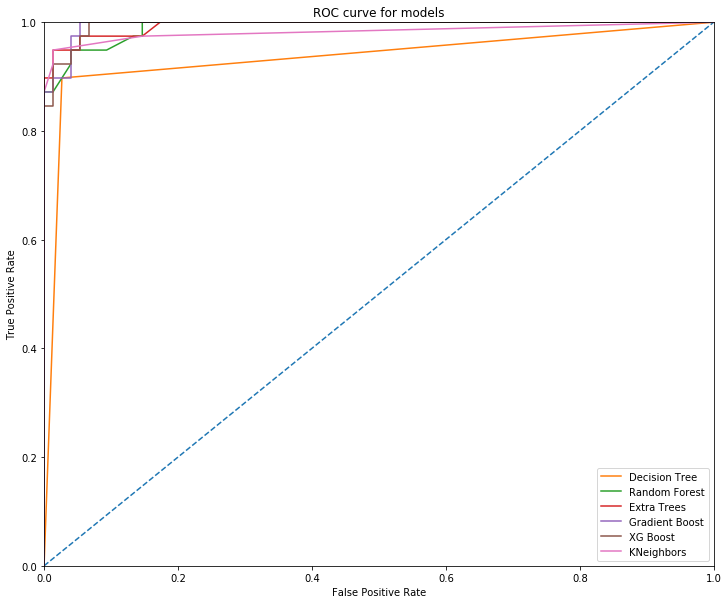

In [37]:
# Plotting Graph
fig = plt.figure(figsize=(12,10))          # Create window frame
ax = fig.add_subplot(111)   # Create axes
# connecting diagonals
ax.plot([0, 1], [0, 1], ls="--")   # Dashed diagonal line
# Creating Labels for Graph
ax.set_xlabel('False Positive Rate')  # Final plot decorations
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve for models')
# Setting graph limits
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# Plotting each graph
ax.plot(fpr_dt, tpr_dt, label = "Decision Tree")
ax.plot(fpr_rf, tpr_rf, label = "Random Forest")
ax.plot(fpr_et, tpr_et, label = "Extra Trees")
ax.plot(fpr_gbm, tpr_gbm, label = "Gradient Boost")
ax.plot(fpr_xg, tpr_xg, label = "XG Boost")
ax.plot(fpr_knn, tpr_knn, label = "KNeighbors")

# Setting legend and show plot
ax.legend(loc="lower right")
plt.show()

In [40]:
print(" Gradient Boost Classfier has the best performance")

 Gradient Boost Classfier has the best performance


In [39]:
print(" Observation : As the FPR increase is faster in Decision Tree classifier, it's AUC is less compared to Gradient Boost Classifier")


 Observation : As the FPR increase is faster in Decision Tree classifier, it's AUC is less compared to Gradient Boost Classifier
